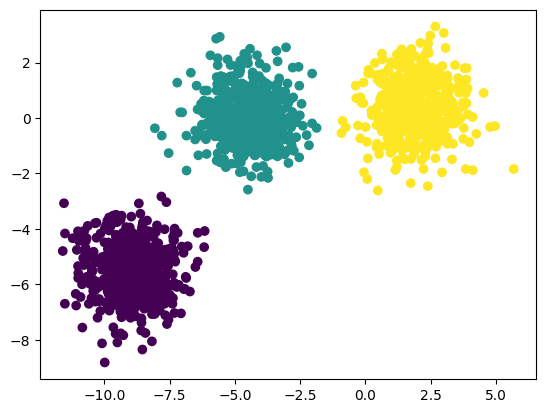

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
n_samples = 1500
random_state = 170

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
plt.scatter(X[:,0],X[:,1],c = y)

><h2>K-means algorithm</h2>
>
><b>Approach:</b> Cluster data by seperate samples to n groups of equal variance. 
>
>Objective is to minimize inertia (Within cluster Sum of squares criteria)
>
><b>Intertia criterion</b>:
>
>![alt text](inertia.png "Inertia")
>
>**Figure 1:** Inertia equation from scikit-learn website.
>
>Scalability: Scales well
>
><b>Disadvantages</b>:
>
>Clusters assumed to be convex and isotropic (Separable and of equal variance).
>
>That is to say, the algorithm will not perform well on clusters with irregular shapes/elongated clusters
>
>Inertia is not a normalized metric. In very high-dimensional spaces, can suffer from the curse of dimensionality
>
><b>Algorithm</b>
><ol>
><li>Choose centroids</li>
>loop until number of iterations is met
><li>Assign each sample to its nearest centroid (label update step)</li>
><li>Recompute centroids for the next iteration by taking mean of alll samples assigned to each centroid.
><br>If new centroids - old centroids is smaller than a threshold, break out of the loop.
><br>If the inertia calculation from new centroids isn't smaller than current minimum don't reassign the centroids.
></li>
></ol>

In [2]:
#Broadcasting logic

clusters = np.array([[1,1],[-1,-1],[2, -2]])
print(X[:,None].shape)
print(X[:None])
print(clusters.shape)
differences = X[:,None] - clusters
print(differences.shape)
vals = np.sum(differences**2,axis = -1)
print(vals.shape)
minimums = np.argmin(vals,axis = -1)

cluster_means = [X[minimums == i].mean(axis = 0) for i in range(len(clusters))]

#End of broadcasting logic

(1500, 1, 2)
[[-5.19811282e+00  6.41869316e-01]
 [-5.75229538e+00  4.18627111e-01]
 [-1.08448984e+01 -7.55352273e+00]
 ...
 [ 1.36105255e+00 -9.07491863e-01]
 [-3.54141108e-01  7.12241630e-01]
 [ 1.88577252e+00  1.41185693e-03]]
(3, 2)
(1500, 3, 2)
(1500, 3)


In [3]:
class KMeans():
    def __init__(self,n_clusters = 8, max_iter = 300, tol = 0.0001, random_state = None):
        self._labels = None
        self._iter = 0
        self._n_clusters = n_clusters
        self._max_iter = max_iter
        self._tol = tol
        self._random_state = random_state
        self._centroids = None
        self._inertia = np.inf
        
    def fit(self,X,y = None):
        #Set random seed
        np.random.seed(self._random_state)
        #Initial selection of centroids
        self._centroids = X[np.random.choice(len(X),self._n_clusters,replace = False)]
        for _ in range (self._max_iter):
            #assign each sample to its nearest centroid (label update step)
            self.assign_label(X)

            new_centroids = np.array([X[self._labels == i].mean(axis = 0) if np.any(self._labels == i) else self._centroids[i] for i in range(self._n_clusters)])
            new_inertia = np.sum((X - new_centroids[self._labels])**2)

            if(np.linalg.norm(new_centroids - self._centroids) < self._tol):
                break

            if new_inertia < self._inertia:
                self._centroids = new_centroids
                self._inertia = new_inertia
            
            self._iter += 1
            print(self._iter)
        

    def assign_label(self,X):
        differences = (X[:,None] - self._centroids)
        distances_between_centroids = np.sum(differences**2,axis = -1)
        self._labels = np.argmin(distances_between_centroids,axis = -1)
        return


In [4]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, tol = 0.00001, random_state = random_state)

In [5]:
kmeans.fit(X)

1
2
3


In [6]:
def plot_results(clustering_class,X):
    plt.figure(figsize = (10,8))
    plt.title("K means algorithm")
    plt.scatter(X[:,0],X[:,1],c = clustering_class._labels,label = "datapoints")
    plt.scatter(clustering_class._centroids[:, 0], clustering_class._centroids[:, 1], marker='x', s=200, color='red', label='Centroids')
    plt.legend()

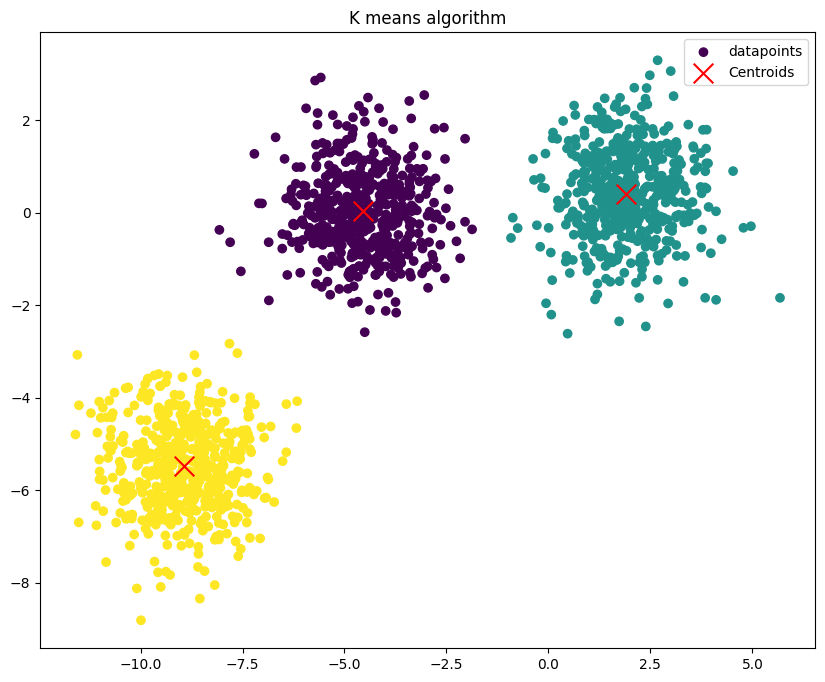

In [7]:
#good clusters
plot_results(kmeans,X)

In [8]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

In [9]:
kmeans_2 = KMeans(n_clusters = 3, max_iter = 300, tol = 0.00001, random_state = random_state)
kmeans_2.fit(X_aniso)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [10]:
print(kmeans_2._iter)

17


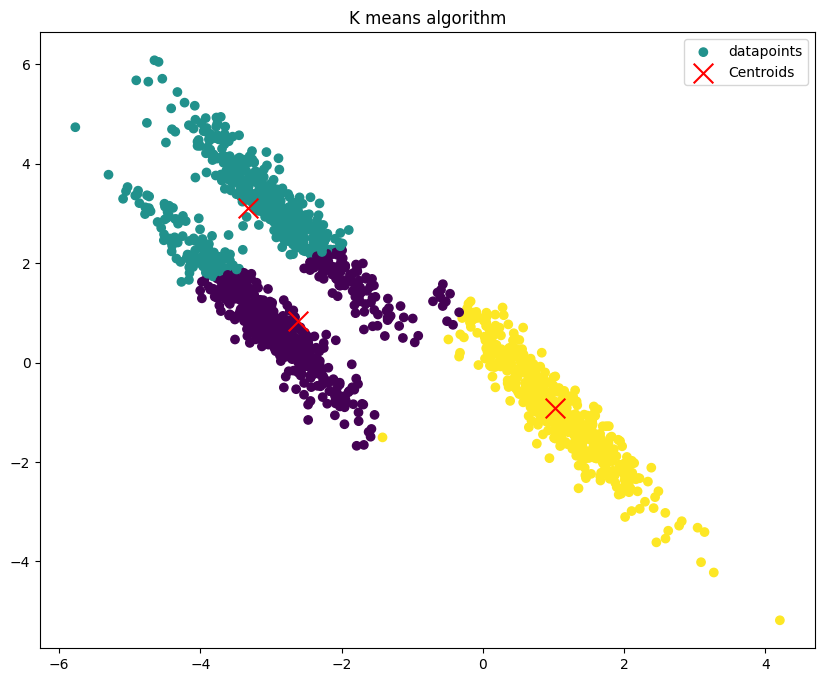

In [11]:
#Poor clusters
plot_results(kmeans_2,X_aniso)